In [5]:
!pip install opencv-contrib-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 MB 608.2 kB/s eta 0:00:0000:0100:03

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [7]:
pip install --upgrade pip opencv-contrib-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 4.3 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: pip
    Found existing installation: pip 23.0.1
    Uninstalling pip-23.0.1:
      Successfully uninstalled pip-23.0.1
Note: you may need to restart the kernel to use updated packages.


In [12]:
import cv2
import glob
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

# Step 1: Preprocessing and feature extraction
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    sift = cv2.xfeatures2d.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(gray, None)
    return descriptors

# Step 2: Clustering
def cluster_features(features, num_clusters):
    features_array = np.concatenate(features)  # Convert list of arrays to a single NumPy array
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(features_array.astype('float32'))  # Convert features to float32
    return kmeans

# Step 3: Assigning visual words
def assign_visual_words(features, kmeans):
    visual_words = kmeans.predict(features)
    visual_words_hist, _ = np.histogram(visual_words, bins=range(kmeans.n_clusters + 1), density=True)
    return visual_words_hist.astype('float32')

# Step 4: Encoding
def encode_image(image_path, kmeans):
    features = preprocess_image(image_path)
    if features is not None:
        visual_words = assign_visual_words(features, kmeans)
        return visual_words
    return None

# Step 5: Training and classification
def train_svm(train_data, train_labels):
    svm = LinearSVC()
    svm.fit(train_data, train_labels)
    return svm

def classify_image(image_path, svm, kmeans):
    encoded_image = encode_image(image_path, kmeans)
    if encoded_image is not None:
        label = svm.predict([encoded_image])
        return label[0]
    return None

# Example usage
# Train a classifier using the training dataset
train_data = []
train_labels = []

classes = sorted(glob.glob("images/train/*"))
print(classes)

for i in range(len(classes)):
    class_images = glob.glob(classes[i] + "/*.jpg")
    num_images_per_class = len(class_images)

    features = []
    for j in range(num_images_per_class):
        image_path = class_images[j]
        descriptors = preprocess_image(image_path)
        if descriptors is not None:
            features.append(descriptors)

    if len(features) > 0:
        kmeans = cluster_features(features, num_clusters=100)
        for j in range(num_images_per_class):
            image_path = class_images[j]
            encoded_image = encode_image(image_path, kmeans)
            if encoded_image is not None:
                train_data.append(encoded_image.astype('float32'))  # Convert encoded_image to float32
                train_labels.append(i)

svm = train_svm(train_data, train_labels)

# Classify a test image
test_image_path = "test.jpg"
predicted_label = classify_image(test_image_path, svm, kmeans)
if predicted_label is not None:
    print("Predicted label:", predicted_label)
else:
    print("Unable to classify the image.")


['images/train/angry', 'images/train/happy', 'images/train/sad', 'images/train/surprise']
Predicted label: 2


In [18]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

def face_detection(image):
    # Read in the image
    img = mpimg.imread(image)

    # Detect the faces in image
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray_img, scaleFactor = 1.3, minNeighbors = 5)
    print(type(faces))
    print(faces)

    for x,y,w,h in faces:
        img = cv2.rectangle(img, (x, y), (x+w, y+h), (255,0,0), 1)

    plt.imshow(img)
    plt.show()

    for x,y,w,h in faces:
        extracted_img = img[y:y+h, x:x+w]
        plt.imshow(extracted_img)
        plt.show()

    return extracted_img

<class 'numpy.ndarray'>
[[160   8 181 181]]


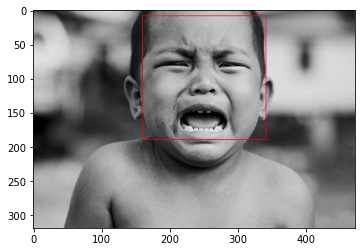

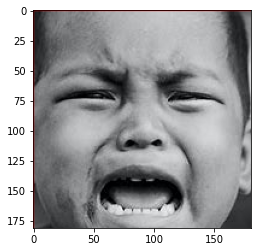

True

In [21]:
extracted_face = face_detection('sad.jpg')
filename = "face.jpg"
cv2.imwrite(filename, extracted_face)

In [23]:
test_image_path = "face.jpg"
predicted_label = classify_image(test_image_path, svm, kmeans)
if predicted_label is not None:
    print("Predicted label:", predicted_label)
else:
    print("Unable to classify the image.")

Predicted label: 3


<class 'numpy.ndarray'>
[[169  65 133 133]]


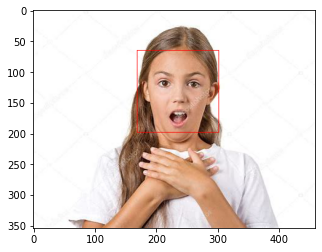

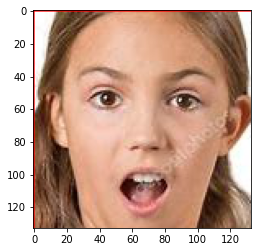

True

In [38]:
extracted_face = face_detection('surprise.jpg')
filename = "face_1.jpg"
cv2.imwrite(filename, extracted_face)

In [39]:
test_image_path = "face_1.jpg"
predicted_label = classify_image(test_image_path, svm, kmeans)
if predicted_label is not None:
    print("Predicted label:", predicted_label)
else:
    print("Unable to classify the image.")

Predicted label: 3
